In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Load the image 
img = cv2.imread('images/background/3.jpg')

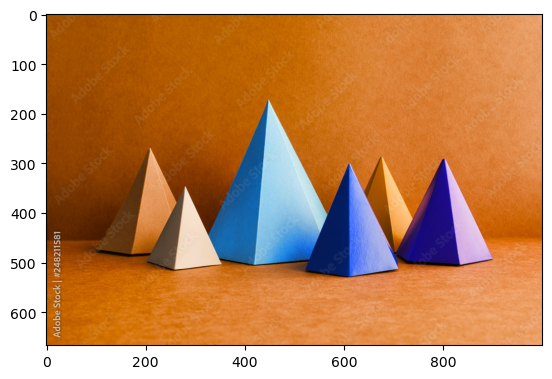

In [11]:
# Show this image
plt.imshow(img)

In [57]:
# Adding the 0 flag to read it in black and white
img_black = cv2.imread('images/background/3.jpg',0)

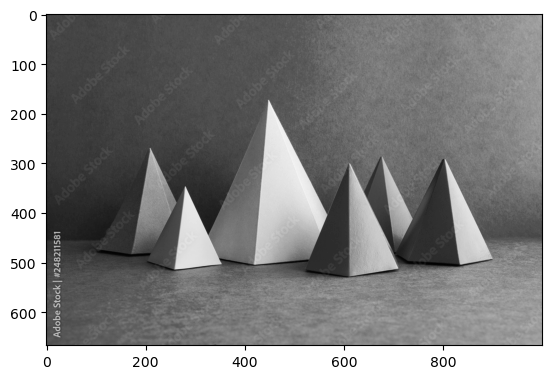

In [56]:
plt.imshow(img_black, cmap='gray')

In [18]:
# Convert to gray with CV2
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

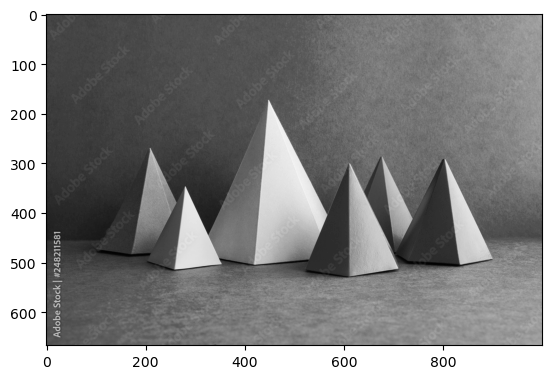

In [20]:
plt.imshow(img_gray, cmap='gray')

## Different Threshold Types

### Binary 

In [76]:
# Aply the threshold on img_gray
ret,thresh1 =cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

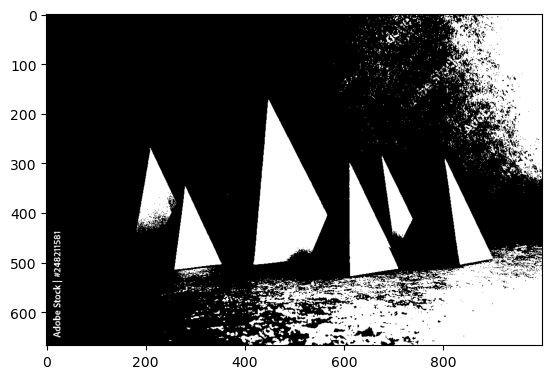

In [77]:
plt.imshow(thresh1, cmap="gray")

### Binary Inverse

In [75]:
# Aply the threshold inverse on img_gray
ret,thresh2 =cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)

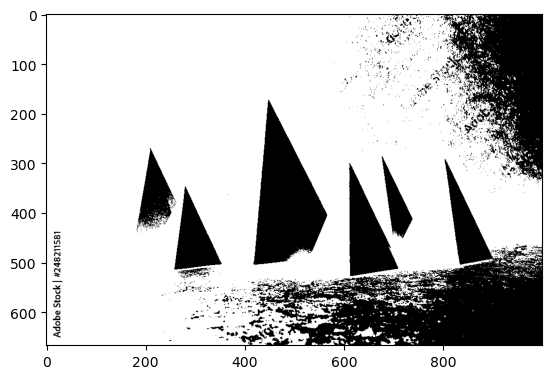

In [79]:
plt.imshow(thresh2, cmap='gray')

### Threshold Truncation

In [80]:
# Aply the threshold inverse on img_gray
ret,thresh3 =cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)

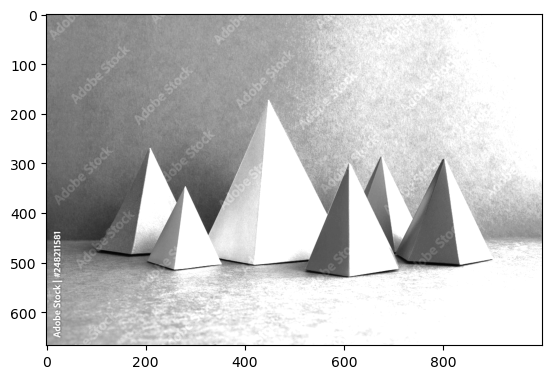

In [81]:
plt.imshow(thresh3,cmap='gray')

### Threshold to Zero

In [ ]:
# Aply the threshold inverse on img_gray
ret,thresh3 =cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)

## Adaptive Thresholding

In [26]:
# We create function to show image
def show_img(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [29]:
img_ad = cv2.imread('images/crossword.jpg',0)

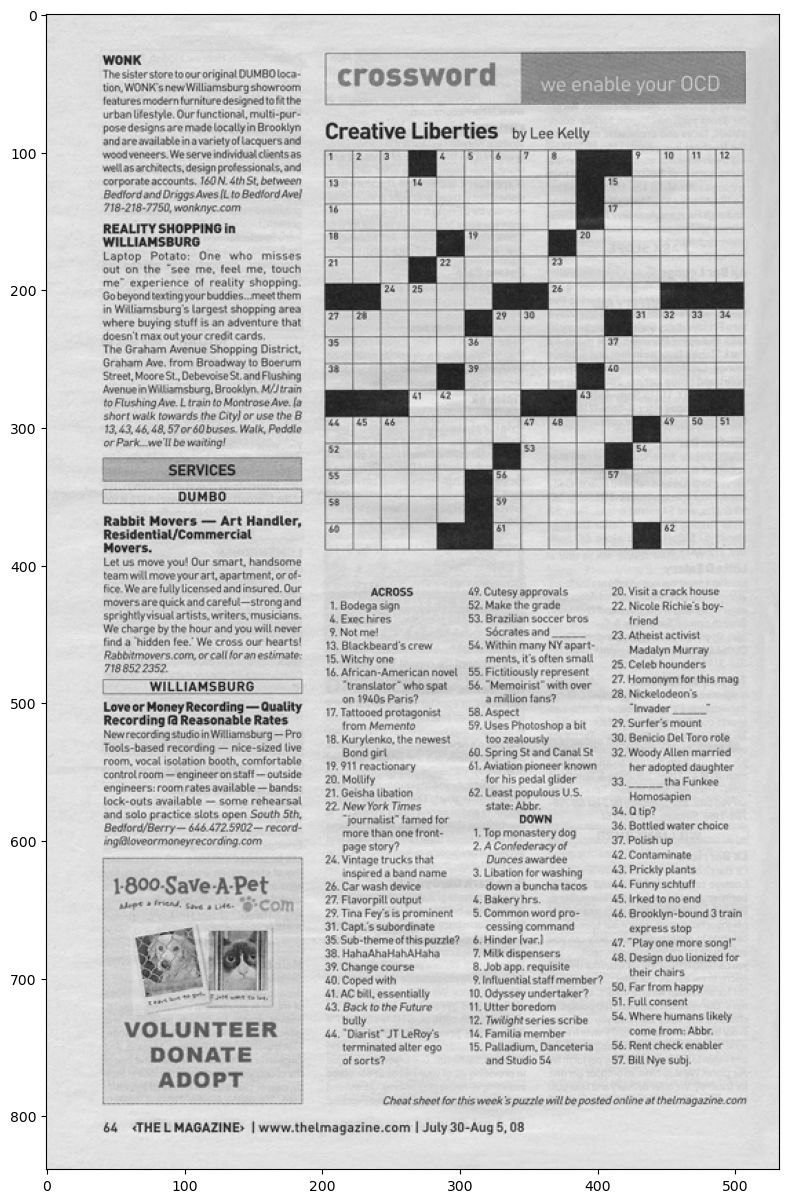

In [30]:
show_img(img_ad)

### Simple Binary

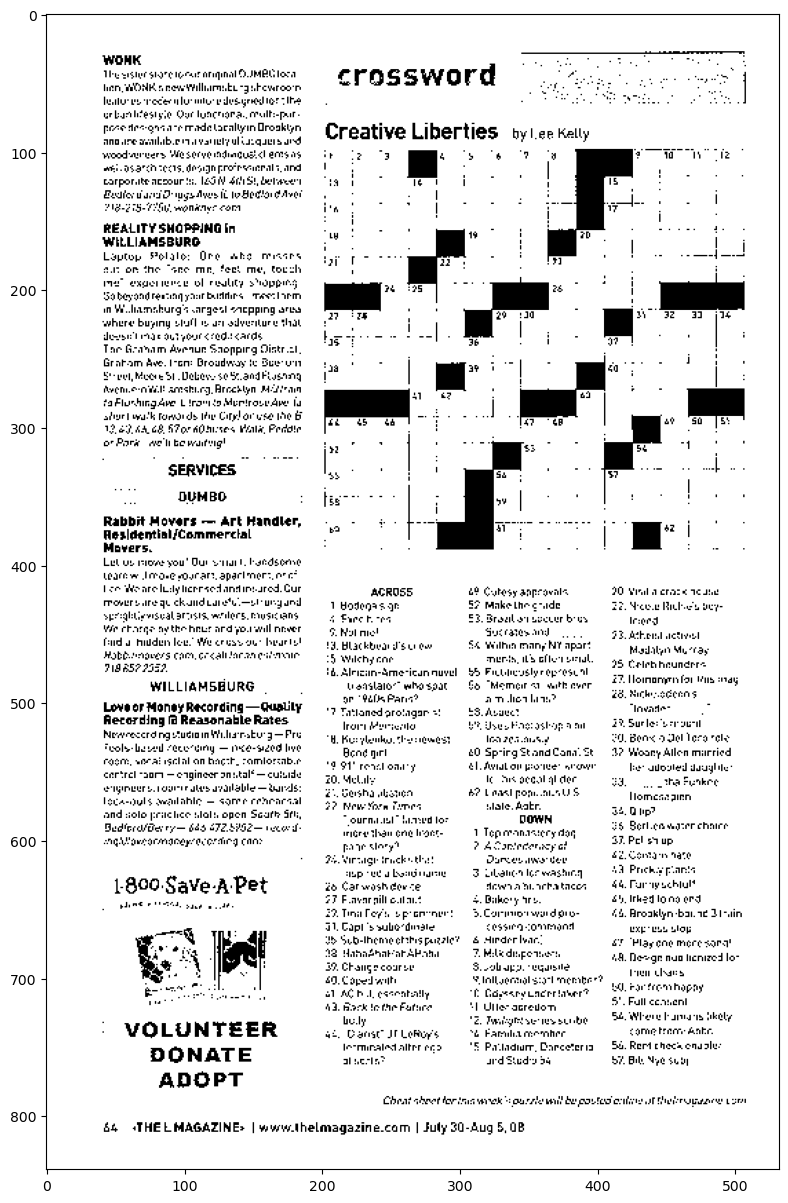

In [42]:
ret, th1 = cv2.threshold(img_ad,127,255,cv2.THRESH_BINARY)
show_img(th1)

### Adaptive Threshold

https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion

    @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
    .   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
    .   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
    .   see #ThresholdTypes.
    .   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
    .   pixel: 3, 5, 7, and so on.
    .   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
    .   is positive but may be zero or negative as well.

 **P.S.** In traditional thresholding methods, a single threshold value is used for the entire image, which can sometimes yield inadequate results for non-uniform images and different lighting conditions. Adaptive thresholding is useful in handling such scenarios.

In adaptive thresholding, the threshold value for each pixel is determined based on the values of neighboring pixels around it. As a result, the threshold value dynamically changes to adapt to different regions of light or dark areas in the image.


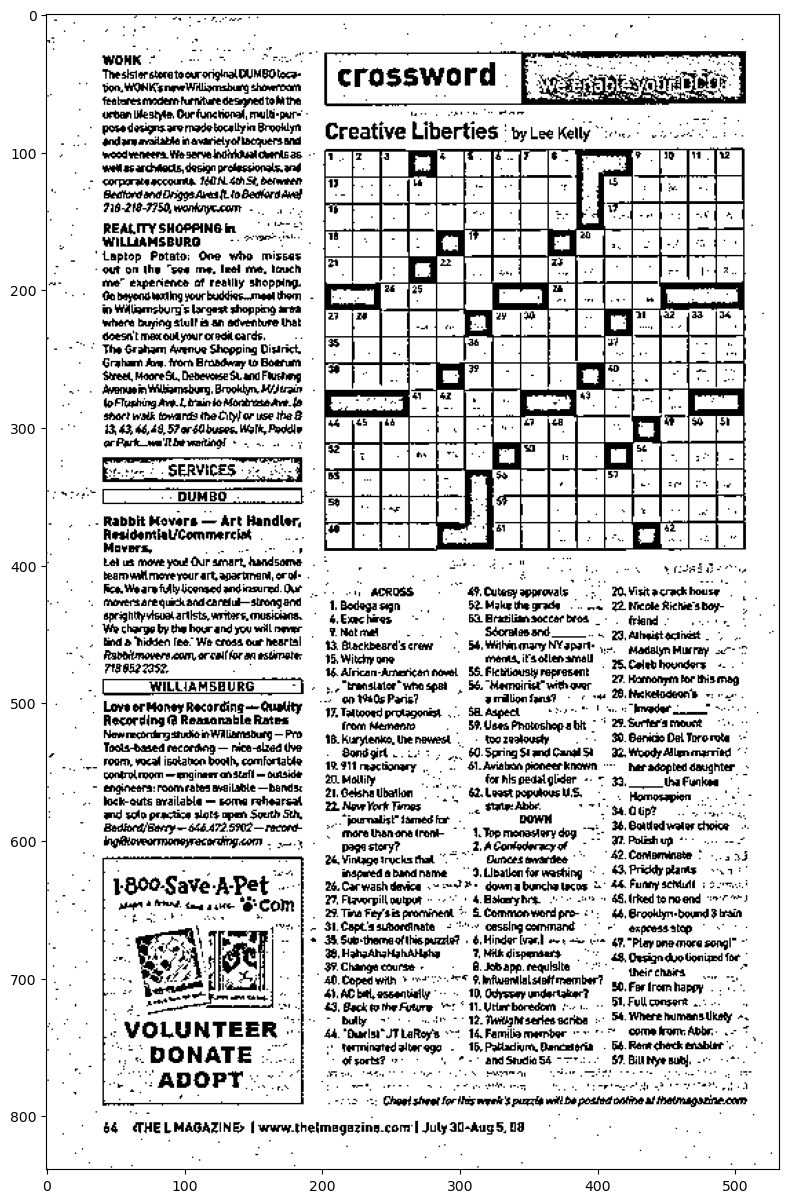

In [34]:
# Use the adaptive threshold with thresh_mean
th2 = cv2.adaptiveThreshold(img_ad,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)
show_img(th2)

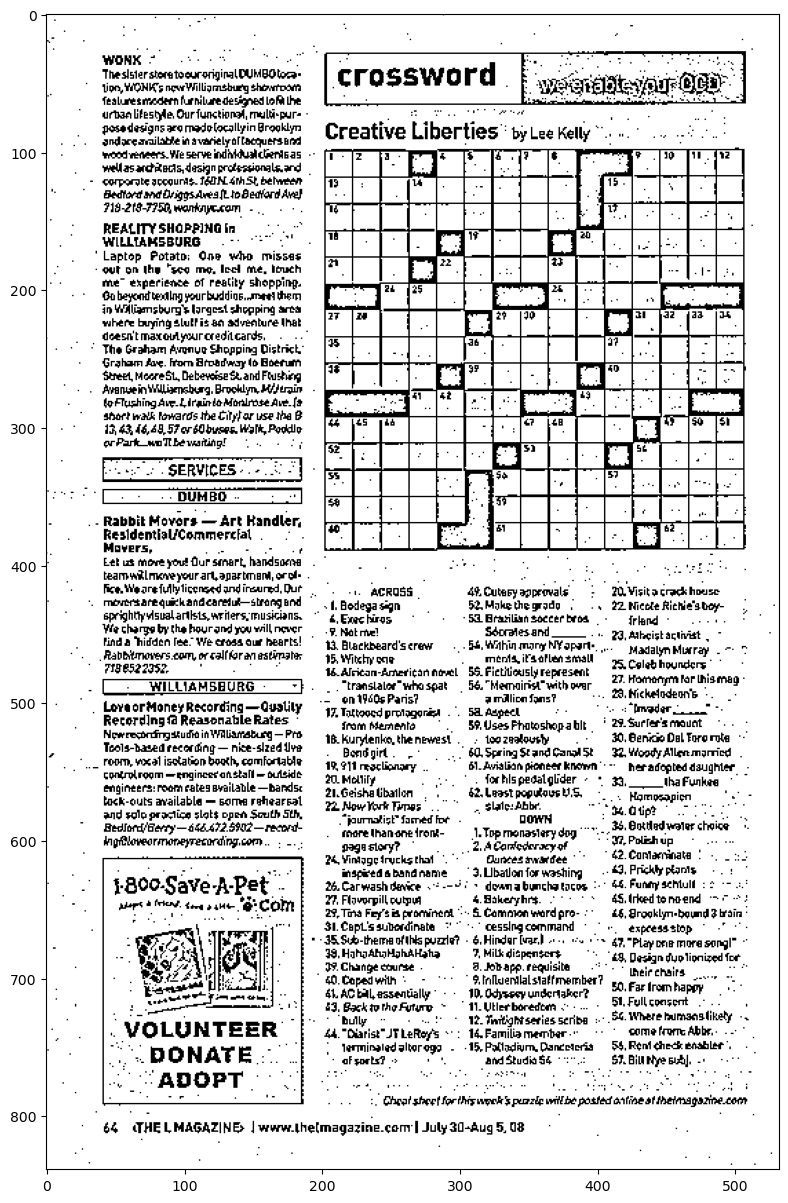

In [35]:
# Use the adaptive threshold with thresh_gaus
th3 = cv2.adaptiveThreshold(img_ad,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,8)
show_img(th3)

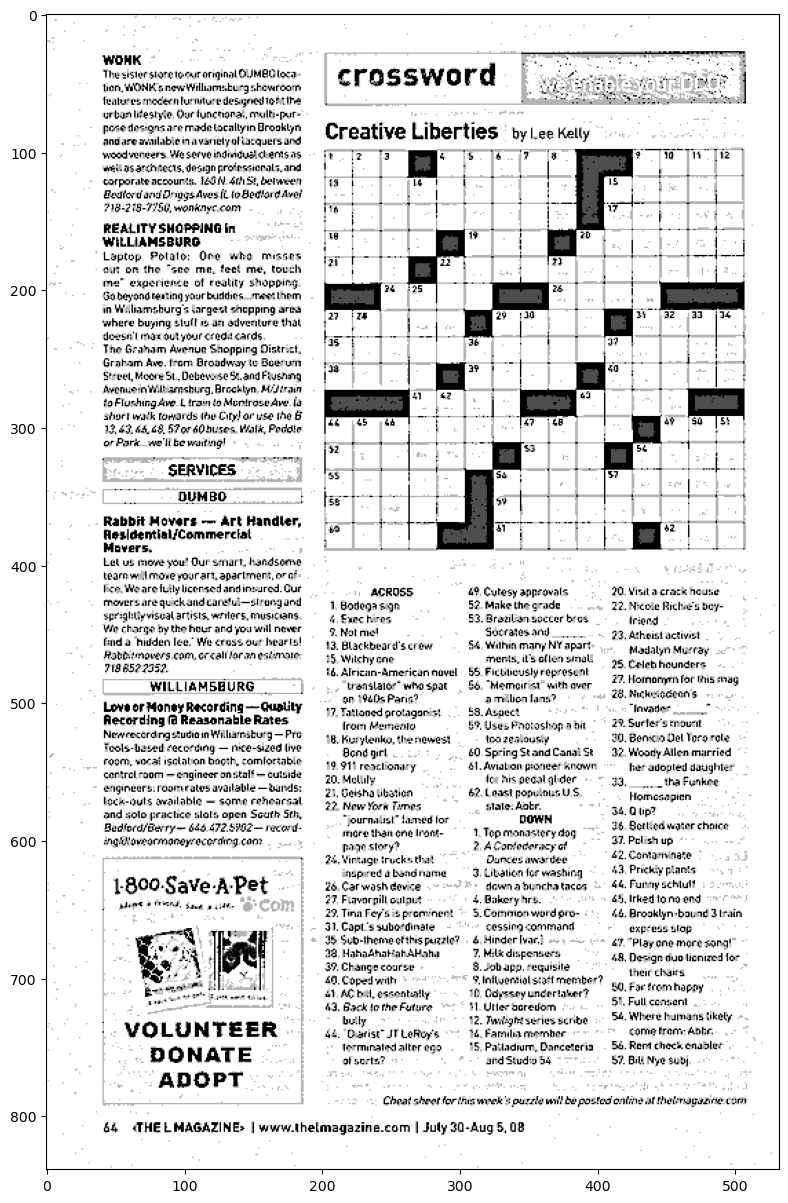

In [43]:
# Finally blend this two images 

blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
show_img(blended)